In [1]:
# boston data loading
from sklearn.datasets import load_boston

boston_data = load_boston()

X = boston_data.data
Y = boston_data.target

In [2]:
# scaling

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(with_mean=False)

In [3]:
X = scaler.fit_transform(X)
feature = boston_data.feature_names

In [4]:
dfX = pd.DataFrame(X, columns=feature)
dfY = pd.DataFrame(Y, columns=["MEDV"])

In [5]:
df_boston = pd.concat([dfX,dfY],axis=1)

In [6]:
df_boston = sm.add_constant(df_boston)

In [7]:
df_boston.head(1)

,const,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,1,0.000736,0.772552,0.337051,0.0,4.647422,9.367131,2.318549,1.94426,0.11496,1.758028,7.074146,4.351754,0.698065,24.0


In [8]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [9]:
result = model.fit(df_boston.ix[:,:-1],df_boston.ix[:,-1])

In [10]:
result.coef_

array([ 0.        , -0.92041113,  1.08098058,  0.14296712,  0.68220346,
       -2.06009246,  2.67064141,  0.02112063, -3.10444805,  2.65878654,
       -2.07589814, -2.06215593,  0.85664044, -3.74867982])

In [11]:
result.intercept_

36.491103280361443

In [12]:
model1 = sm.OLS(df_boston.ix[:,-1],df_boston.ix[:,:-1])
result1 = model1.fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sun, 12 Jun 2016   Prob (F-statistic):          6.95e-135
Time:                        23:41:32   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4911      5.104      7.149      0.0

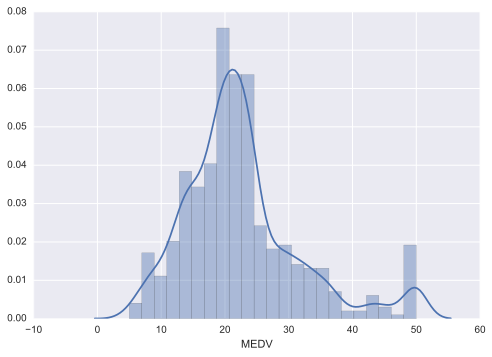

In [13]:
sns.distplot(df_boston.MEDV)

In [14]:
df_boston2 = df_boston.drop(df_boston[df_boston.MEDV >= df_boston.MEDV.max()].index)
df_boston2.head(1)

,const,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,1,0.000736,0.772552,0.337051,0.0,4.647422,9.367131,2.318549,1.94426,0.11496,1.758028,7.074146,4.351754,0.698065,24.0


In [15]:
model2 = sm.OLS(df_boston2.ix[:,-1],df_boston2.ix[:,:-1])
result2 = model2.fit()
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     128.0
Date:                Sun, 12 Jun 2016   Prob (F-statistic):          4.79e-146
Time:                        23:41:37   Log-Likelihood:                -1337.1
No. Observations:                 490   AIC:                             2702.
Df Residuals:                     476   BIC:                             2761.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         32.2611      4.125      7.821      0.0

In [16]:
import statsmodels.api 
model_anova = sm.OLS.from_formula("MEDV ~ INDUS + C(CHAS)", data = df_boston2)
result_anova = model_anova.fit()
table_anova = sm.stats.anova_lm(result_anova)
table_anova

,df,sum_sq,mean_sq,F,PR(>F)
C(CHAS),1.0,169.271183,169.271183,4.320590,3.817684e-02
INDUS,1.0,11002.130375,11002.130375,280.825664,4.233424e-50
Residual,487.0,19079.586278,39.177795,NaN,NaN


In [17]:
sk_model2 = LinearRegression()

In [18]:
sk_result = sk_model2.fit(df_boston2.ix[:,:-1],df_boston2.ix[:,-1])
sk_result.coef_

array([ 0.        , -0.90670198,  0.8218828 , -0.29825317,  0.11555586,
       -1.43856592,  2.63509594, -0.66398505, -2.54724295,  2.18110049,
       -2.31851126, -1.81435162,  0.72377893, -2.5036931 ])

In [19]:
sk_result.intercept_

32.261106875317672

In [20]:
from sklearn.cross_validation import cross_val_score

score = cross_val_score(sk_model2, df_boston2.ix[:,:-1],df_boston2.ix[:,-1], cv=5)


In [21]:
score

array([ 0.670774  ,  0.77345121,  0.5308856 ,  0.00644914,  0.11065571])

In [22]:
score.mean()

0.41844313129206878

In [23]:
score.std()

0.30555426893282145

In [24]:
df_boston2.head(1)

,const,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,1,0.000736,0.772552,0.337051,0.0,4.647422,9.367131,2.318549,1.94426,0.11496,1.758028,7.074146,4.351754,0.698065,24.0


In [25]:
df_boston3 = df_boston2.drop(["CRIM","DIS","LSTAT","MEDV"],axis=1)
df_boston3["CRIM"] = np.log(dfX.CRIM)
df_boston3["DIS"] = np.log(dfX.DIS)
df_boston3["LSTAT"] = np.log(dfX.LSTAT)
df_boston3["MEDV"] = dfY.MEDV

In [26]:
model3 = sm.OLS(df_boston3.ix[:,-1],df_boston3.ix[:,:-1])
result = model3.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     143.8
Date:                Sun, 12 Jun 2016   Prob (F-statistic):          1.91e-155
Time:                        23:41:49   Log-Likelihood:                -1314.7
No. Observations:                 490   AIC:                             2657.
Df Residuals:                     476   BIC:                             2716.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.5248      3.930      7.767      0.0

In [27]:
sk_model3 = LinearRegression()
scores3 = cross_val_score(sk_model3, df_boston3.ix[:,:-1],df_boston3.ix[:,-1], cv=5)

In [28]:
scores3

array([ 0.68959667,  0.78222319,  0.58690158,  0.13525116,  0.24691975])

In [29]:
scores3.mean()

0.48817847061802622

In [30]:
scores3.std()

0.2528008298676635

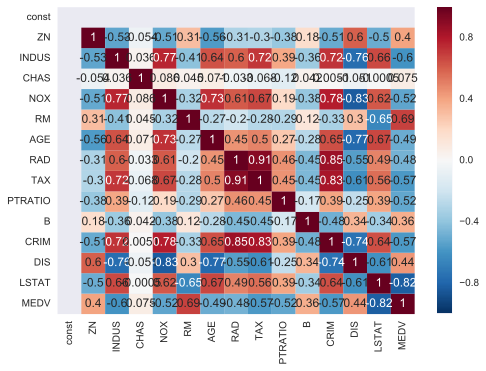

In [31]:
sns.heatmap(np.corrcoef(df_boston3.T), xticklabels=df_boston3.columns, yticklabels=df_boston3.columns, annot=True)

In [32]:
df_boston3 = df_boston3.drop(["ZN","INDUS","AGE","CRIM"],axis=1)

In [34]:
model = sm.OLS(df_boston3.ix[:,-1],df_boston3.ix[:,:-1])
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     209.1
Date:                Sun, 12 Jun 2016   Prob (F-statistic):          6.89e-160
Time:                        23:45:04   Log-Likelihood:                -1315.0
No. Observations:                 490   AIC:                             2650.
Df Residuals:                     480   BIC:                             2692.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         31.2476      3.737      8.361      0.0

In [35]:
sk_model = LinearRegression()

result = cross_val_score(sk_model, df_boston3.ix[:,:-1],df_boston3.ix[:,-1], cv=5)

In [36]:
result

array([ 0.72319109,  0.78563139,  0.61497277,  0.26420584,  0.30413905])

In [37]:
result.mean()

0.53842802863758932

In [38]:
result.std()

0.21503261199735343

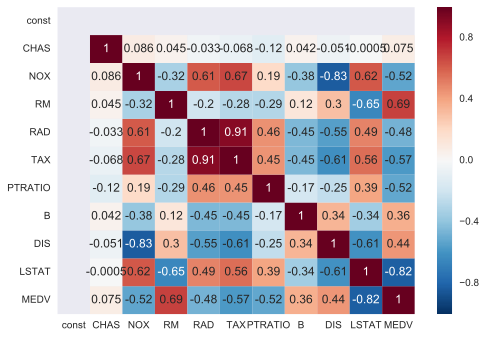

In [43]:
sns.heatmap(np.corrcoef(df_boston3.T), xticklabels=df_boston3.columns, yticklabels=df_boston3.columns, annot=True)